In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
FILE_TRAIN = 'data/pp-training.csv'
FILE_TEST = 'data/pp-testing.csv'

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [5]:
# cols = ['lat','lon','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False)

In [6]:
alldata = df
allcols = list(alldata)
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price',], axis=1),
                                                    alldata.price, test_size=0.1, train_size=0.5, random_state=0)

In [7]:
regr = RandomForestRegressor(n_jobs=-1, warm_start=True)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.66594227633524294

### Score variando la cantidad de arboles usados

/home/tomi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


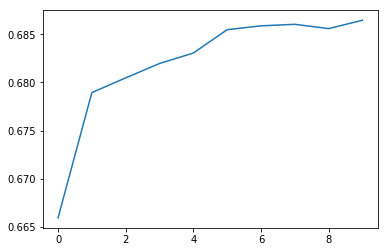

In [8]:
scores = []
n=10
for i in range(10):
    regr.set_params(n_estimators=n, n_jobs=-1)
    regr.fit(X_train,y_train)
    scores.append(regr.score(X_test,y_test))
    n+=10
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores)

A medida que se aumenta la cantidad de arboles, el score mejora, teniendo un pico en 80 arboles

In [9]:
regr = RandomForestRegressor(n_jobs=-1, n_estimators=90, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.68306520089757261

### Relevancia de datos:

In [31]:
import matplotlib.pyplot as plt
def plot_datos(X,df):
    feature_importance = X.feature_importances_
    feature_importance = 10.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pvals = feature_importance[sorted_idx]
    best_values = pvals
    pos = np.arange(sorted_idx.shape[0]) + .5
    pcols = df.columns[sorted_idx]
    plt.figure(figsize=(10,10))
    plt.barh(pos, pvals, align='center')
    plt.yticks(pos, pcols)
    return plt, pcols
    

<module 'matplotlib.pyplot' from '/home/tomi/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

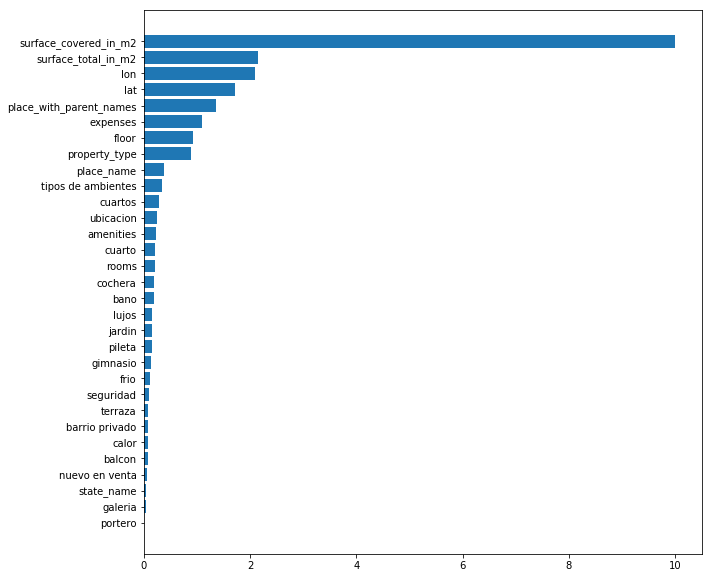

In [32]:
plt, best_values = plot_datos(regr, X_train)
plt

Como vemos hay informacion muy relevante como el tamaño de la propiedad, y la ubicacion geografica, y mas aun en la longitud, que difiere entre que tan al norte y sur esta una propiedad. Mientras que otras mas tienen muy poca relevancia o nula, en el caso de si la propiedad cuenta con portero o no.
Vamos a variar estos parametros para ver si conseguimos mejores resultados

### Mejorando hiperparametros

In [19]:
BestScore = 0.68626095609420334
cols_2 = ['surface_covered_in_m2','surface_total_in_m2','lat','lon','property_type','cuartos','rooms','bano','amenities']
train = X_train[cols] 
test = X_test[cols]

In [20]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=80, random_state=0, max_depth=50)
rf.fit(train, y_train)
rf.score(test, y_test)

0.67089082355939689

### Prediciendo los datos de Kaggle

In [ ]:
kaggle = pd.read_csv(FILE_TEST, low_memory=False)
kaggle = kaggle[cols]

In [ ]:
train = alldata[cols+['price']]
X_t = train.drop(['price'], axis=1)
y_t = train.price
kaggle_test = kaggle[list(X_t)]

In [ ]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=80, random_state=0)
rf.fit(X_t, y_t)
predicted = rf.predict(kaggle_test)

In [ ]:
ids = pd.read_csv('data/properati_dataset_testing_noprice.csv')
ids = ids[['id']]
df2 = pd.DataFrame(predicted)
df3 = ids.join(df2)
df3.columns = ['id','price_usd']
df3.to_csv('data/prediccion-kaggle-RandomForest.csv', index=False)

In [ ]:
df3